# Importer les Bibliothèques

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Charger et Préparer les Données



In [ ]:
# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normaliser les images (valeurs entre 0 et 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Applatir les images pour les modèles scikit-learn
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Vérification de la forme des données
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28), x_test shape: (10000, 28, 28)


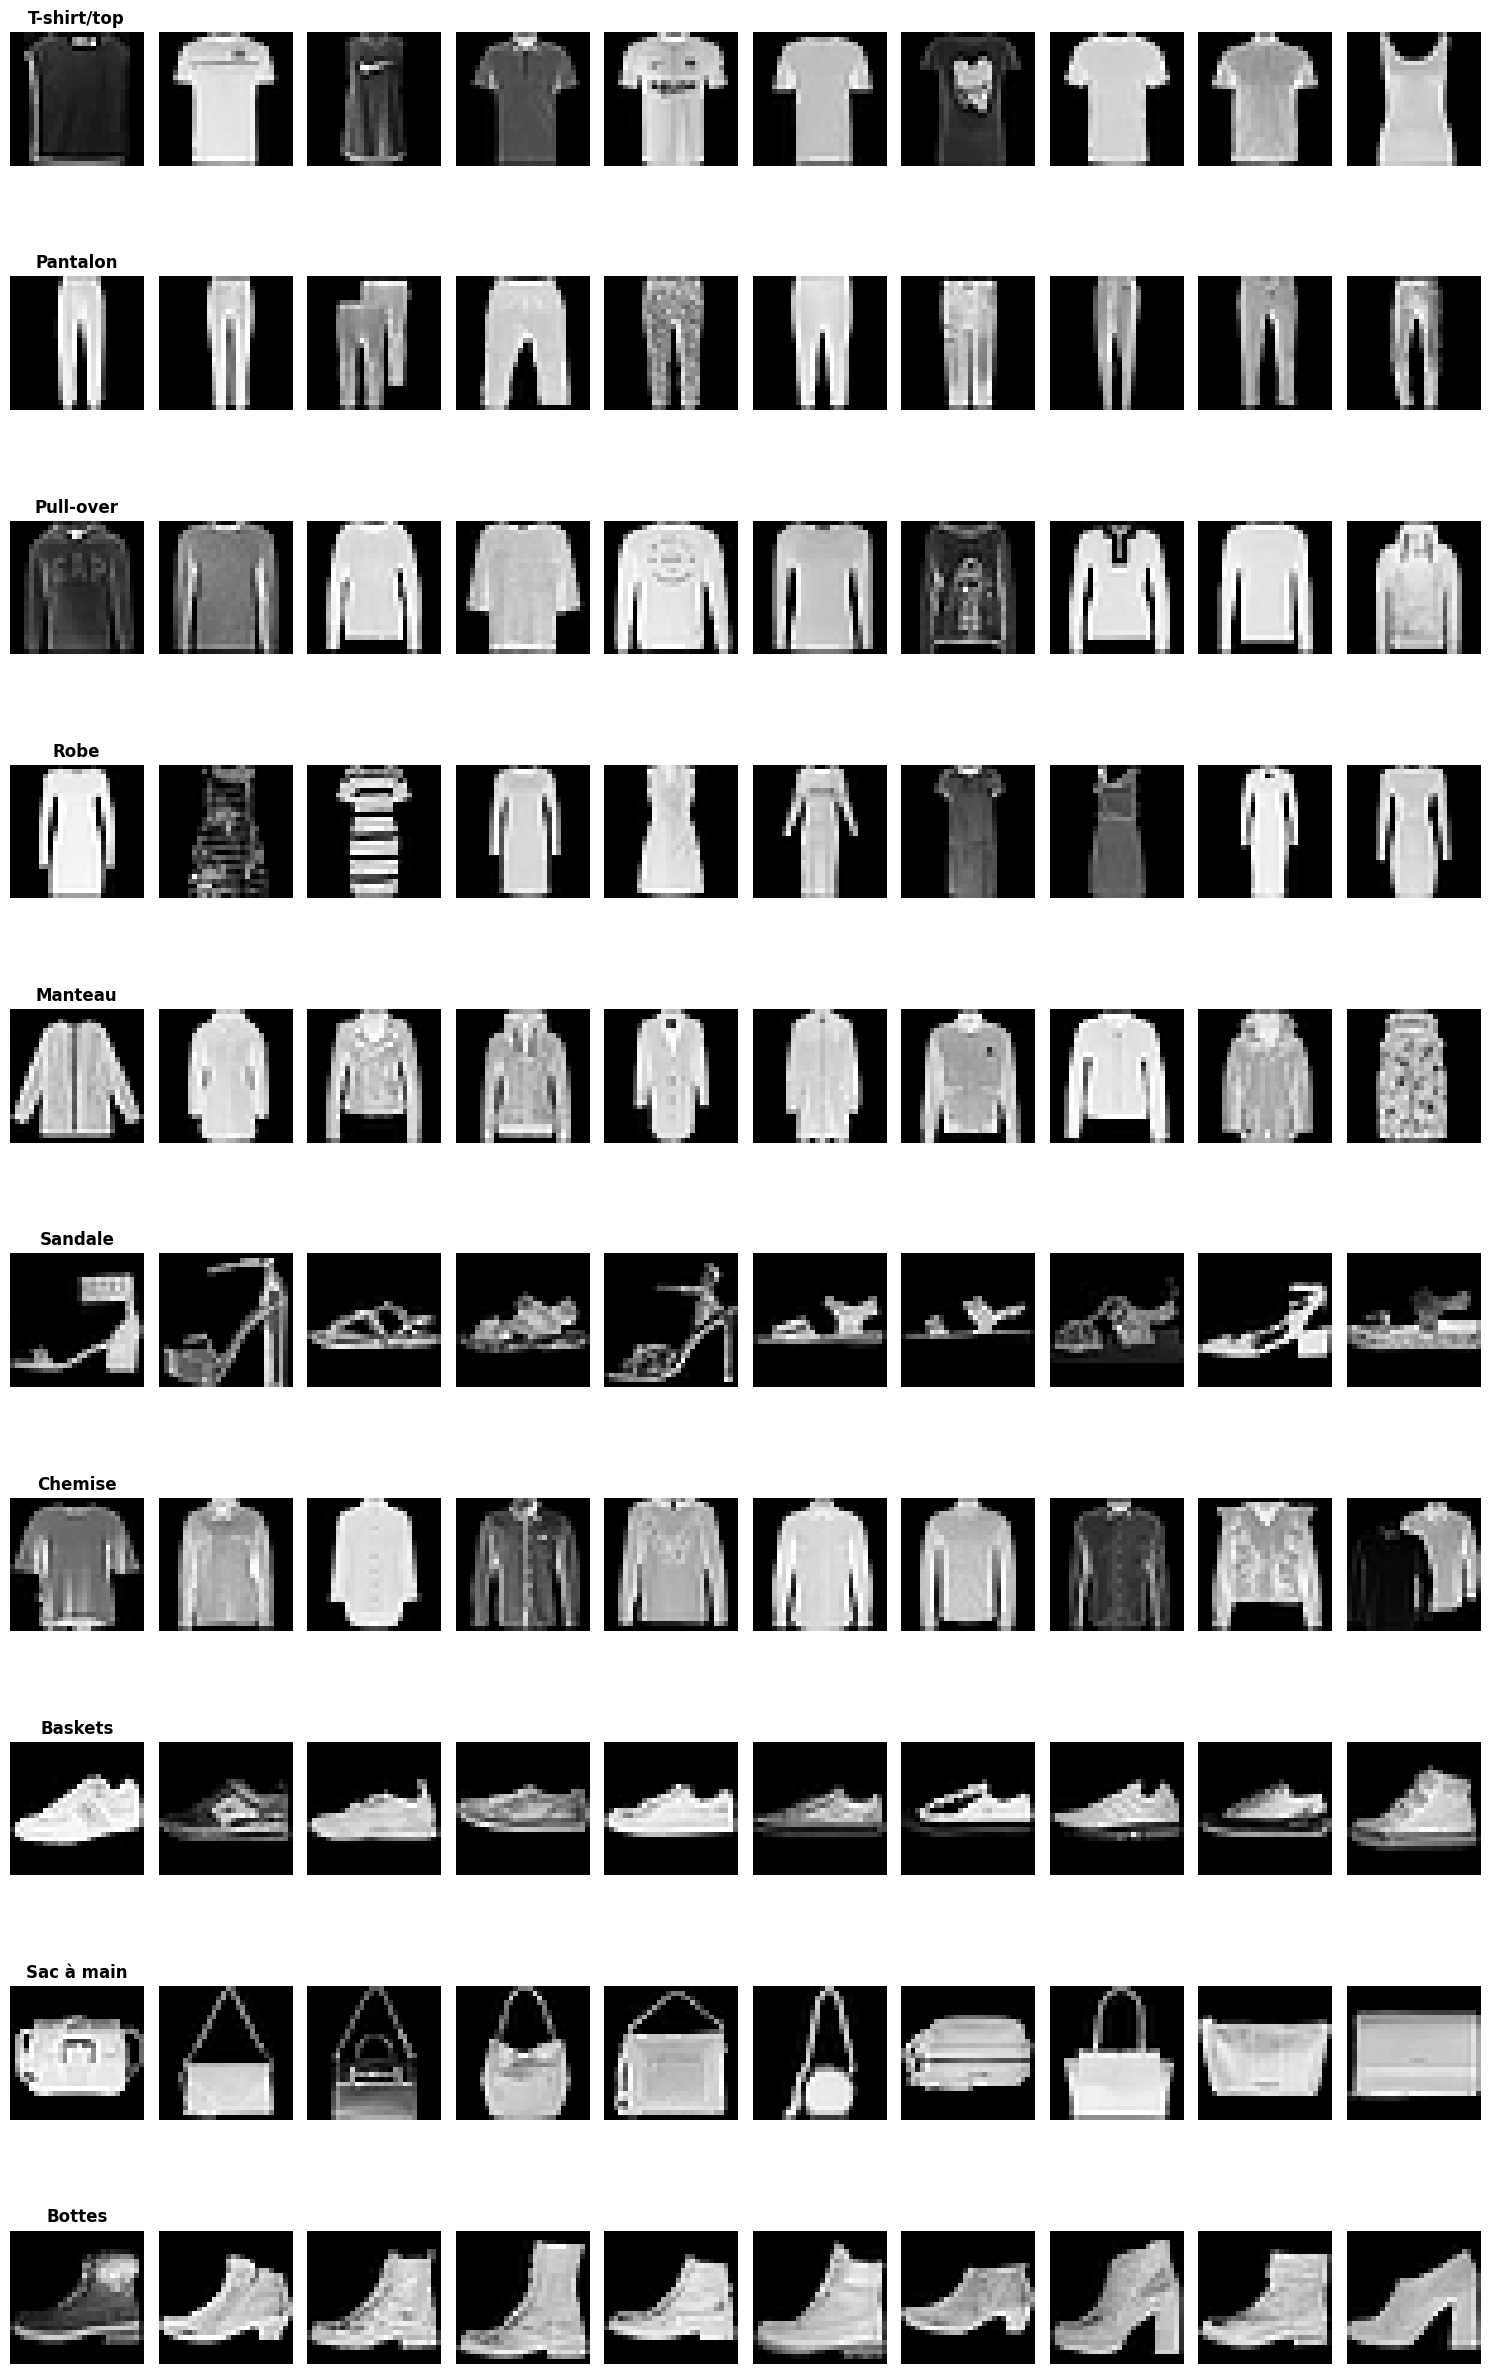

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des classes
class_names = [
    'T-shirt/top', 'Pantalon', 'Pull-over', 'Robe', 'Manteau',
    'Sandale', 'Chemise', 'Baskets', 'Sac à main', 'Bottes'
]

# Créer un graphique pour chaque classe
fig, axes = plt.subplots(10, 10, figsize=(15, 25))

for i in range(10):
    # Récupérer les indices des images de la classe
    indices = np.where(y_train == i)[0][:100]  # Récupérer 100 images par classe

    # Afficher les 100 premières images de la classe
    for j in range(100):
        ax = axes[i, j % 10]  # Ajuster la disposition pour afficher 10 images par ligne
        ax.imshow(x_train[indices[j]], cmap='gray')
        ax.axis('off')

        # Afficher le titre de la classe uniquement dans la première colonne (colonne 0)
        if j % 10 == 0:
            ax.set_title(class_names[i], fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# Entraînement et Prédiction des Modèles


# 1. Logistic Regression





In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialiser et entraîner le modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_log_reg = log_reg.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_log_reg = log_reg.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_log_reg = log_reg.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (Logistic Regression): {train_accuracy_log_reg}")
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg}")


Train Accuracy (Logistic Regression): 0.88045
Test Accuracy (Logistic Regression): 0.8435



# 2. K-Nearest Neighbors (KNN)



In [ ]:
# Initialiser et entraîner le modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_knn = knn.predict(x_test_flat)
# Calculer l'exactitude sur les données d'entraînement

train_accuracy_knn = knn.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_knn = knn.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (knn): {train_accuracy_knn}")
print(f"Test Accuracy (knn): {test_accuracy_knn}")



Train Accuracy (knn): 0.9199333333333334
Test Accuracy (knn): 0.8541


# 3. Decision Tree




In [ ]:
# Initialiser et entraîner le modèle Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_tree = tree.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_tree= tree.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_tree = tree.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (tree): {train_accuracy_tree}")
print(f"Test Accuracy (tree): {test_accuracy_tree}")


Train Accuracy (tree): 1.0
Test Accuracy (tree): 0.7888


# 4. SVM

In [ ]:
# Initialiser et entraîner le modèle SVM
svm = SVC()
svm.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_svm = svm.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_svm = svm.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_svm = svm.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy: {train_accuracy_svm}")
print(f"Test Accuracy: {test_accuracy_svm}")


Train Accuracy: 0.9128
Test Accuracy: 0.8828


# 5. Naive Bayes

In [ ]:
# Initialiser et entraîner le modèle Naive Bayes
nb = GaussianNB()
nb.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_nb = nb.predict(x_test_flat)
# Calculer l'exactitude sur les données d'entraînement
train_accuracy_nb = nb.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_nb = nb.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (nb): {train_accuracy_nb}")
print(f"Test Accuracy (nb): {test_accuracy_nb}")



Train Accuracy (nb): 0.5877833333333333
Test Accuracy (nb): 0.5856


# 6. Random Forest

In [ ]:
# Initialiser et entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_rf = rf.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_rf = rf.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_rf = rf.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (rf): {train_accuracy_rf}")
print(f"Test Accuracy (rf): {test_accuracy_rf}")


Train Accuracy (rf): 0.9999833333333333
Test Accuracy (rf): 0.8764


# 7. XGBoost

In [ ]:
# Initialiser et entraîner le modèle XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_xgb = xgb.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_xgb = xgb.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_xgb = xgb.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (xgb): {train_accuracy_xgb}")
print(f"Test Accuracy (xgb): {test_accuracy_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:48:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy (xgb): 0.9612333333333334
Test Accuracy (xgb): 0.8835


# Évaluation des Modèles avec des Visualisations

# 1.   Matrice de Confusion










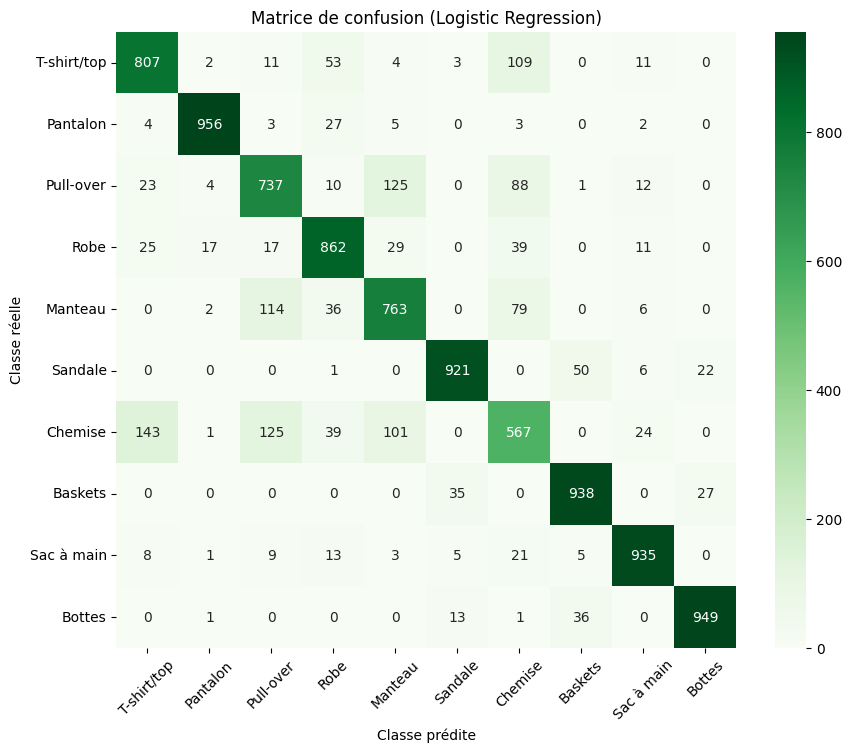

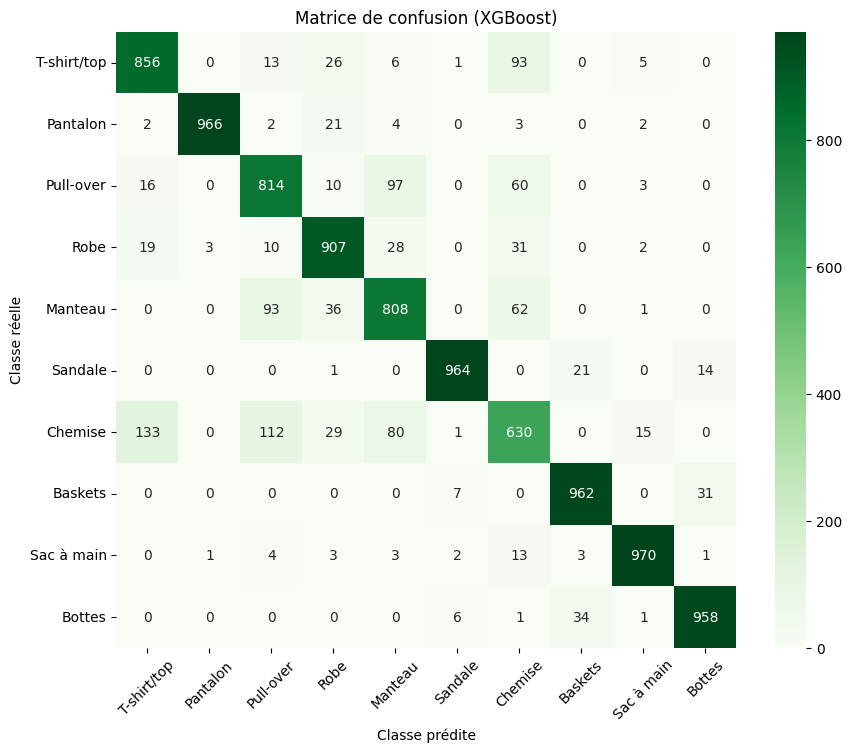

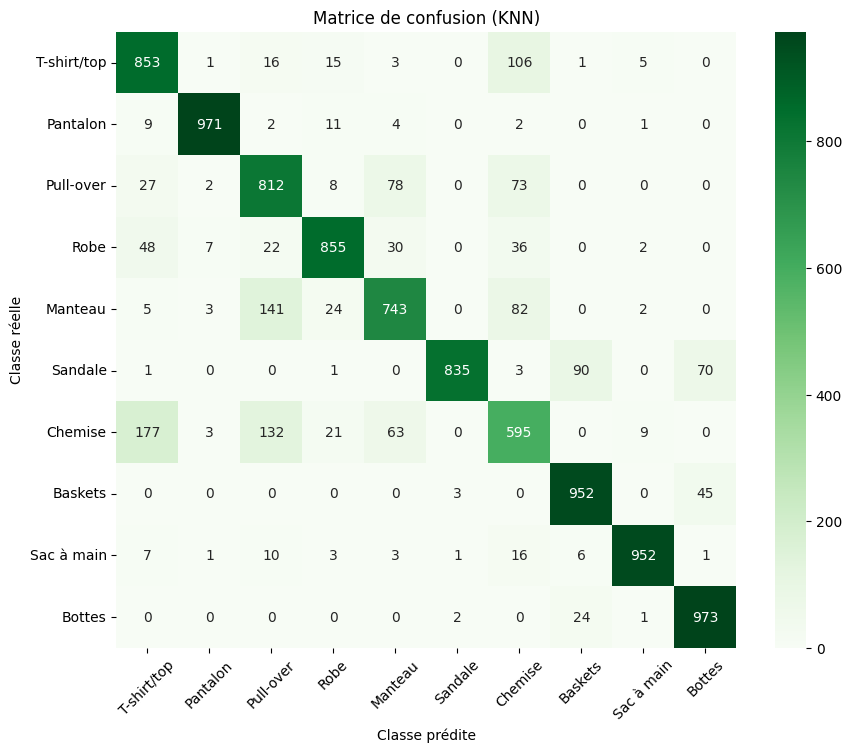

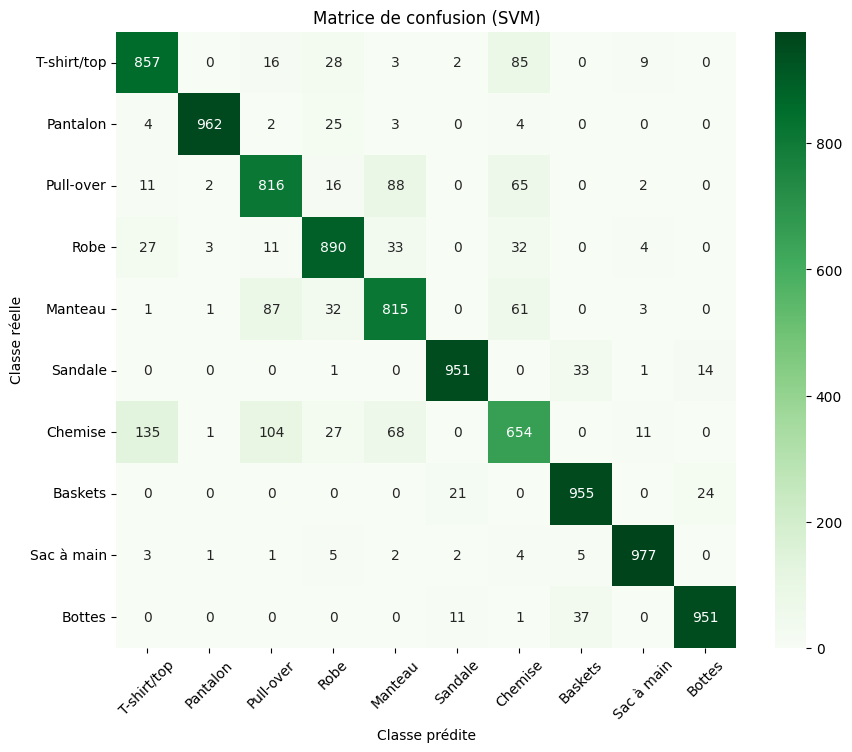

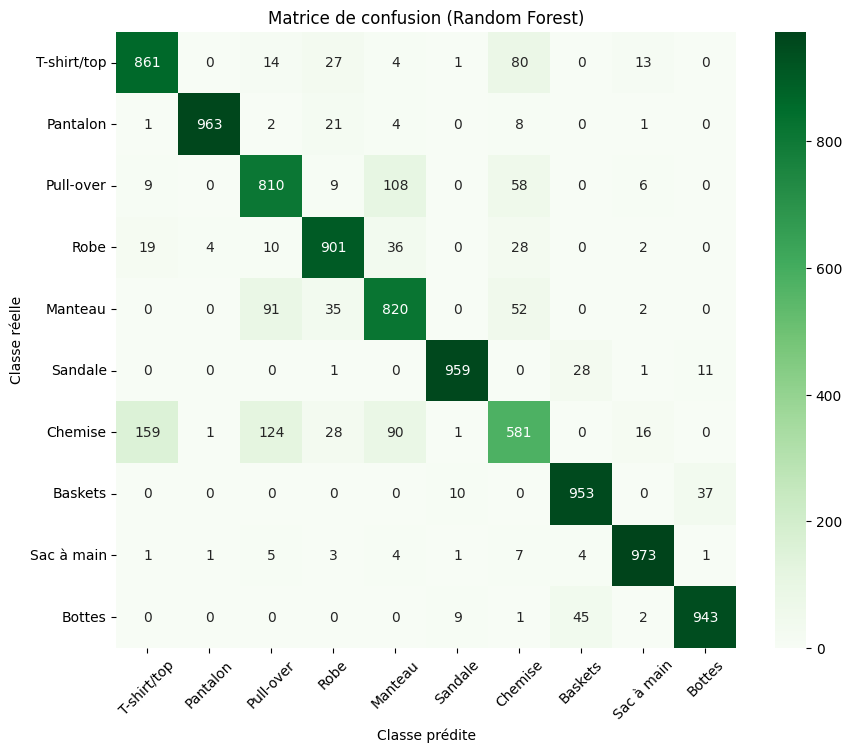

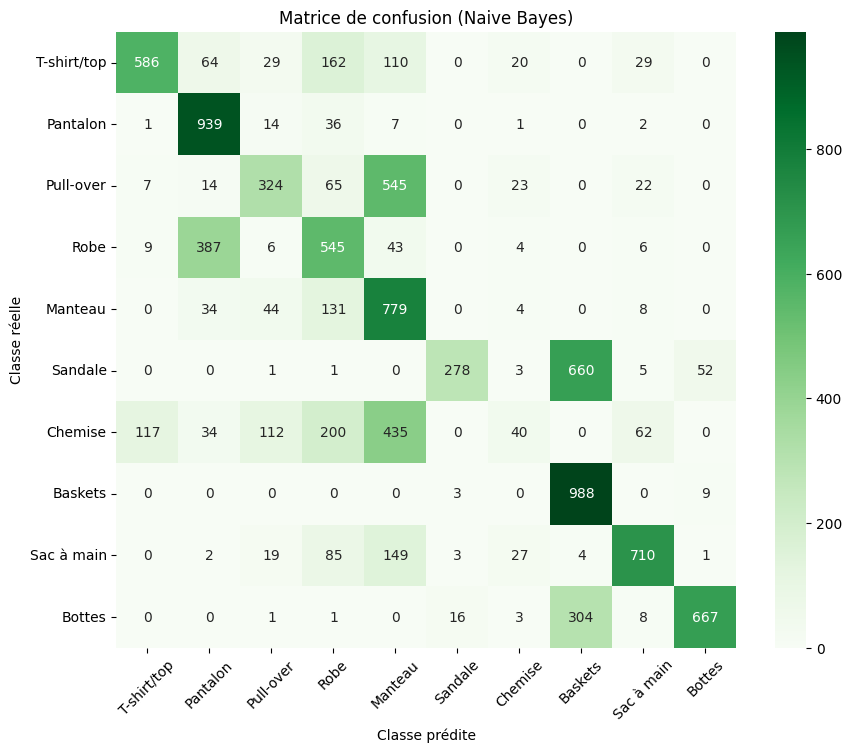

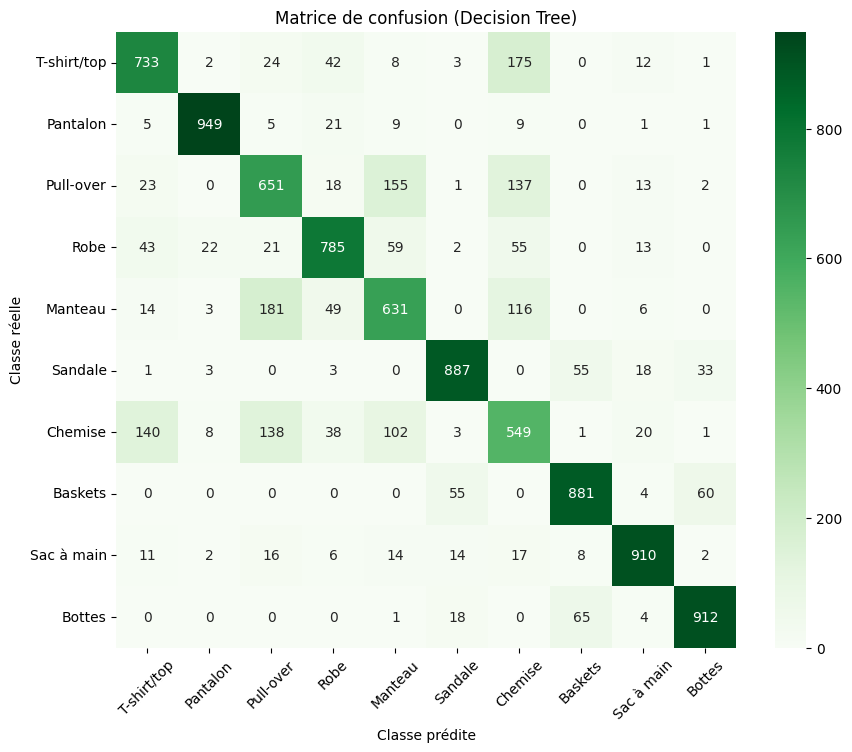

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction pour afficher la matrice de confusion et le rapport de classification
def evaluate_model(model_name, y_test, y_pred, class_names):
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualiser la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Matrice de confusion ({model_name})")
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.xticks(rotation=45)  # Inclinaison des noms des classes pour une meilleure lisibilité
    plt.yticks(rotation=0)   # Garde les noms des classes verticalement
    plt.show()

# Évaluation des modèles
models_predictions = {
  "Logistic Regression": y_pred_log_reg,
    "XGBoost": y_pred_xgb,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_tree
}

# Boucle sur chaque modèle pour afficher les résultats
for model_name, y_pred in models_predictions.items():
    evaluate_model(model_name, y_test, y_pred, class_names)




# 2. Classification Report ( les métriques )



In [ ]:
# Affichage des classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.59      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.98      0.97      0.98      1000
        

# 3.  Courbes ROC et AUC





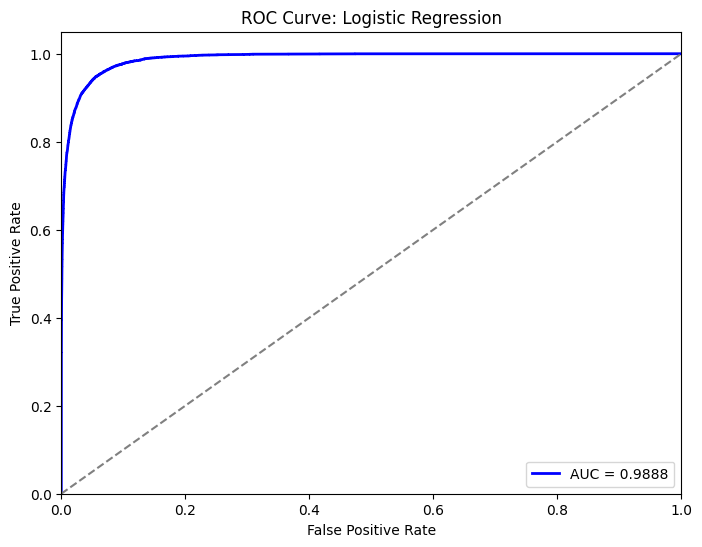

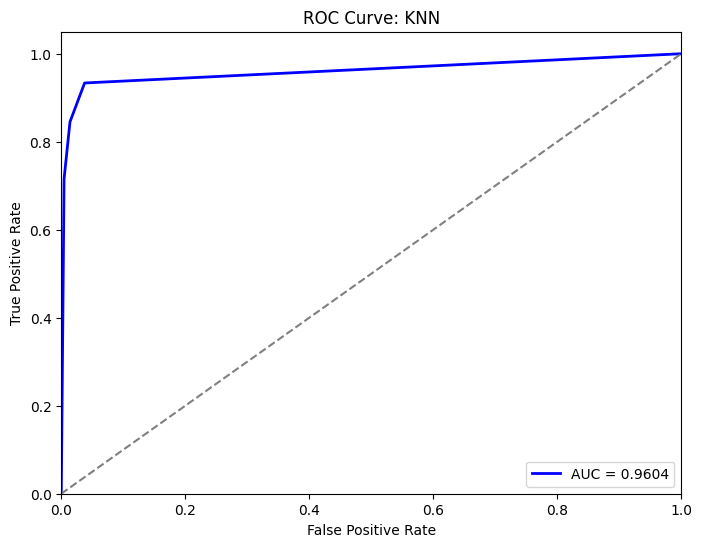

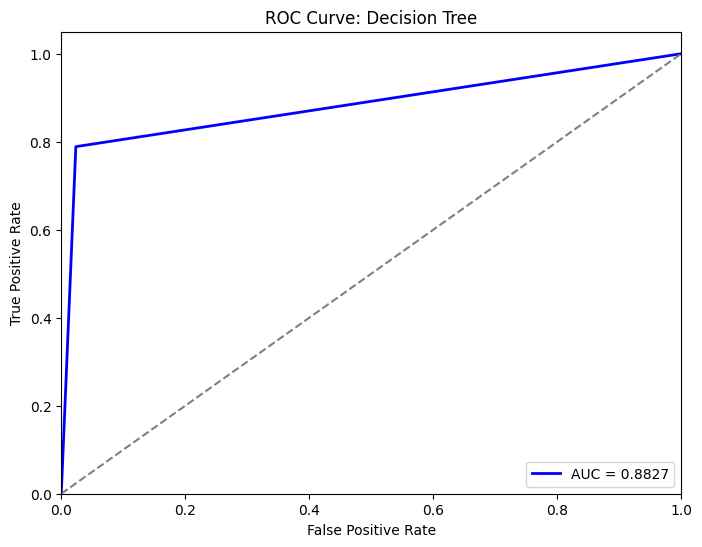

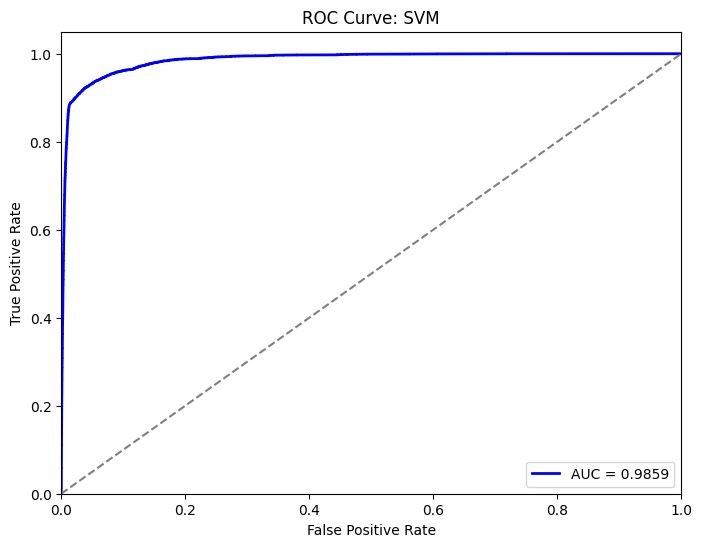

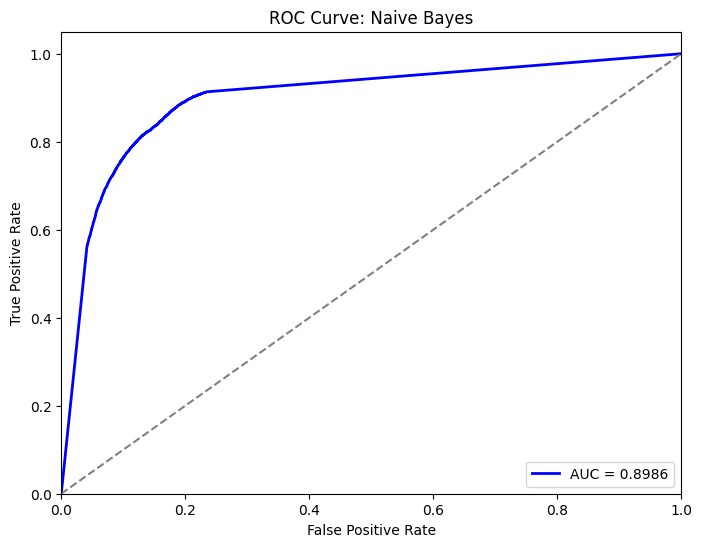

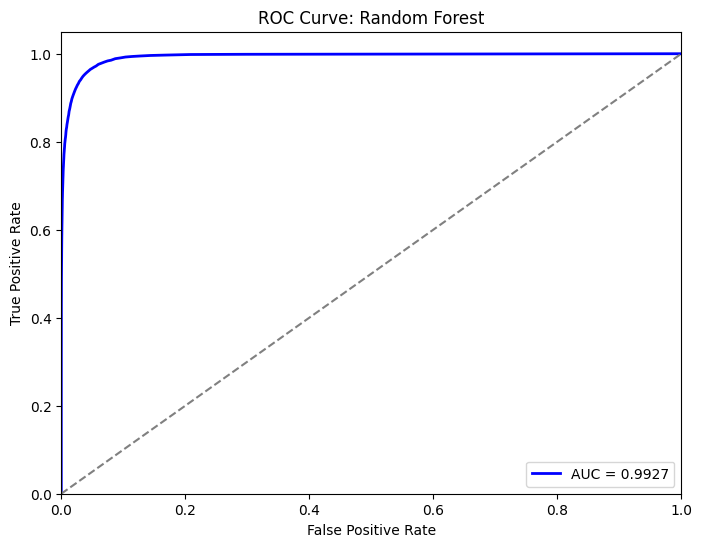

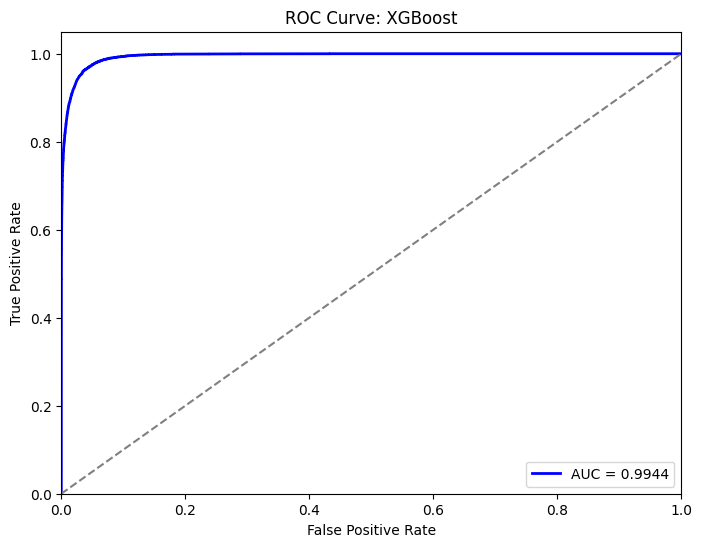

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Fonction pour afficher la courbe ROC
def plot_roc_curve(y_true, y_pred_prob, model_name):
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true)

    # Calculer les courbes ROC et AUC
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc='lower right')
    plt.show()

# Prédictions de probabilité pour chaque modèle
log_reg_prob = log_reg.predict_proba(x_test_flat)
knn_prob = knn.predict_proba(x_test_flat)
tree_prob = tree.predict_proba(x_test_flat)
svm_prob = svm.decision_function(x_test_flat)
nb_prob = nb.predict_proba(x_test_flat)

# Prédictions de probabilité pour les nouveaux modèles
rf_prob = rf.predict_proba(x_test_flat)

xgb_prob = xgb.predict_proba(x_test_flat)

# Affichage des courbes ROC


# Affichage des courbes ROC
plot_roc_curve(y_test, log_reg_prob, 'Logistic Regression')
plot_roc_curve(y_test, knn_prob, 'KNN')
plot_roc_curve(y_test, tree_prob, 'Decision Tree')
plot_roc_curve(y_test, svm_prob, 'SVM')
plot_roc_curve(y_test, nb_prob, 'Naive Bayes')

plot_roc_curve(y_test, rf_prob, 'Random Forest')
plot_roc_curve(y_test, xgb_prob, 'XGBoost')